In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os

%matplotlib inline

PATH = os.path.abspath('..')


# ALFALFA results

In [2]:

with open (f'{PATH}/results/environment/transition_results.txt', 'r') as f:
    lines = f.readlines()
    env_results = np.array([[np.mean([float(l[10:14]), float(l[15:19])]),
                             float(l[21:27]),
                             float(l[32:38])
                            ] 
        for l in lines])

In [3]:
# merge with previous tests
overdense  = [0.9, 0.3269, 0.0066] # a40 valid overdense
underdense = [0.1, 0.2184, 0.0022] # a40 valid underdense

env_results = np.vstack([underdense, env_results, overdense])

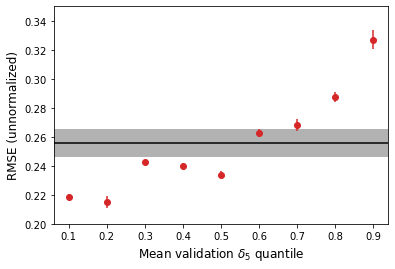

In [4]:
plt.errorbar(env_results[:,0],
             env_results[:,1],
             env_results[:,2], 
             c='C3', marker='o', ls='none'
            )

plt.axhline(0.2557 , c='k')
plt.axhspan((0.2557 - 0.0094),
            (0.2557 + 0.0094),
            alpha=0.3, lw=0,
            color='k'
           )

plt.ylabel('RMSE (unnormalized)', fontsize=12)
plt.xlabel(r'Mean validation $\delta_5$ quantile', fontsize=12)

plt.ylim(0.2, 0.35);

Get normalization factors

In [5]:
a40 = (pd.read_csv("../data/a40-SDSS_gas-frac.csv")
        .join(pd.read_csv("../data/a.40-delta_5.csv", index_col="AGCNr"), on="AGCNr", rsuffix='_a40')
        .join(pd.read_csv("../data/a40.datafile3.csv", index_col="AGCNr"), on="AGCNr", rsuffix='_sdss')
)

In [6]:
norm_factors = []

logd5_mins  = []
logd5_means = []
logd5_maxes = []

for q1 in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    q2 = q1+0.2
    
    q_range = (a40.delta_5 >= a40.delta_5.quantile(q1)) & (a40.delta_5 < a40.delta_5.quantile(q2))
    
    
    logd5_mins.append(np.nanmin(np.log10(a40[q_range].delta_5)))
    logd5_means.append(np.nanmean(np.log10(a40[q_range].delta_5)))
    logd5_maxes.append(np.nanmax(np.log10(a40[q_range].delta_5)))
    
    norm_factors.append(a40[q_range].logfgas.std())
    
norm_factors = np.array(norm_factors)
print(norm_factors)

[0.52432098 0.53799584 0.56715179 0.57123332 0.57944726 0.60218981
 0.61339672 0.63370006 0.67064222]


In [7]:
display(env_results[:, 1] / norm_factors)
display(env_results[:, 2] / norm_factors)

array([0.41653874, 0.40000309, 0.42739881, 0.41979344, 0.40366055,
       0.43624119, 0.43740045, 0.45384247, 0.48744322])

array([0.0041959 , 0.00799263, 0.00282111, 0.00315108, 0.00448703,
       0.00448364, 0.00684712, 0.00552312, 0.00984131])

In [8]:
overall_std = np.log10(a40.delta_5.std())
print(f'overall sample mean (a40A): {overall_std:.4f}')


print(f'normalized overall mean: {0.2557 / overall_std:.4f} +/- {0.0094 / overall_std:.4f}')

overall sample mean (a40A): 0.6036
normalized overall mean: 0.4237 +/- 0.0156


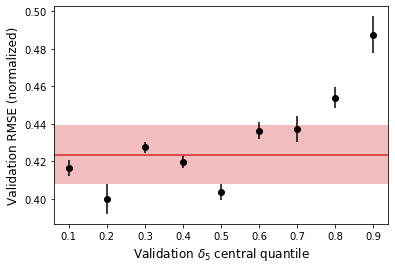

In [9]:
plt.errorbar(env_results[:,0],
             env_results[:,1] / norm_factors,
             env_results[:,2] / norm_factors, 
             c='k', marker='o', ls='none'
            )
plt.ylabel('Validation RMSE (normalized)', fontsize=12)
plt.xlabel(r'Validation $\delta_5$ central quantile', fontsize=12)

plt.axhline(0.2557 / overall_std, c='C3')
plt.axhspan((0.2557 - 0.0094) / overall_std,
            (0.2557 + 0.0094) / overall_std,
            alpha=0.3, lw=0,
            color='C3'
           )

# plt.savefig(f'{PATH}/results/figures/environment-trends.png')

What are these in terms of log(1+$\delta$)?

In [10]:
logd5_mins

[-0.9512771319714821,
 -0.3464147312591956,
 -0.19929430882077506,
 -0.08421625976740237,
 0.024693458374723264,
 0.12543626023407864,
 0.23124272664225068,
 0.35749918946869436,
 0.4901058809783508]

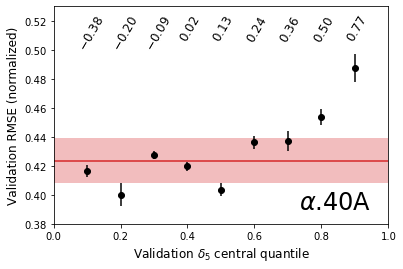

In [11]:

plt.errorbar(env_results[:,0],
             env_results[:,1] / norm_factors,
             env_results[:,2] / norm_factors, 
             c='k', marker='o', ls='none'
            )
plt.ylabel('Validation RMSE (normalized)', fontsize=12)
plt.xlabel(r'Validation $\delta_5$ central quantile', fontsize=12)


for i in range(len(env_results)):
    d5_range = f'({logd5_mins[i]:.2f}, {logd5_maxes[i]:.2f})'
    d5_mean = f'${logd5_means[i]:.2f}$'
    plt.text(x=env_results[i,0] - 0.03, 
             y=0.525, # env_results[i,1] / norm_factors[i]+2e-3, 
             s=d5_mean, #d5_range, 
             rotation=60,
             va='top',
             fontsize=12
            )
    
plt.axhline(0.2557 / overall_std, c='C3')
plt.axhspan((0.2557 - 0.0094) / overall_std,
            (0.2557 + 0.0094) / overall_std,
            alpha=0.3, lw=0,
            color='C3'
           )

plt.text(0.95, 0.39, r'$\alpha$.40A', fontsize=24, ha='right')
    
plt.ylim(0.38, 0.53)
plt.xlim(0.0, 1.0);

plt.savefig(f'{PATH}/results/figures/environment-trends.pdf')

Same thing but with zero overlap in delta_5

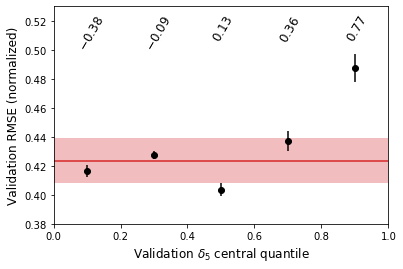

In [12]:
plt.errorbar(env_results[::2,0],
             env_results[::2,1] / norm_factors[::2],
             env_results[::2,2] / norm_factors[::2], 
             c='k', marker='o', ls='none'
            )
plt.ylabel('Validation RMSE (normalized)', fontsize=12)
plt.xlabel(r'Validation $\delta_5$ central quantile', fontsize=12)


for i in range(len(env_results))[::2]:
    d5_range = f'({logd5_mins[i]:.2f}, {logd5_maxes[i]:.2f})'
    d5_mean = f'${logd5_means[i]:.2f}$'
    plt.text(x=env_results[i,0] - 0.03, 
             y=0.525, # env_results[i,1] / norm_factors[i]+2e-3, 
             s=d5_mean, #d5_range, 
             rotation=60,
             va='top',
             fontsize=12
            )
    
plt.axhline(0.2557 / overall_std, c='C3')
plt.axhspan((0.2557 - 0.0094) / overall_std,
            (0.2557 + 0.0094) / overall_std,
            alpha=0.3, lw=0,
            color='C3'
           )
    
plt.ylim(0.38, 0.53)
plt.xlim(0.0, 1.0);

# xGASS results

In [13]:
xg = (pd.read_csv(f'{PATH}/data/xGASS_representative_sample.csv', index_col=0)
        .join(pd.read_csv(f"{PATH}/data/xGASS-delta_5.csv", index_col="GASS"), on="GASS", rsuffix='d5')
     )

xg['logfgas'] = xg.lgMHI - xg.lgMstar

In [14]:
# intrinsic scatter for different groups
isolated = (xg.env_code_B == 1)
grouped = (xg.env_code_B == 0) | (xg.env_code_B == 2)

display(xg[isolated].logfgas.std())
display(xg[grouped].logfgas.std())

0.6462870949144293

0.6255501626094042

In [15]:
env_means = []
env_stds = []
norm_factors = []
logd5_means = []

for q in np.arange(0.1, 1.0, 0.1):
    q1 = q-0.1
    q2 = q+0.1
    
    # mean +/- std
    fn = f"{PATH}/results/environment/transition-xgass/overdense_{q1:.2f}-{q2:.2f}.txt"
    res = np.genfromtxt(fn)
    
    env_means.append(res.mean())
    env_stds.append(res.std())
    
    # inherent scatter
    q_range = (xg.delta_5 >= xg.delta_5.quantile(q1)) & (xg.delta_5 < xg.delta_5.quantile(q2))
    norm_factors.append(xg[q_range].logfgas.std())
    
    logd5_means.append(np.nanmean(np.log10(xg[q_range].delta_5)))


    
env_means = np.array(env_means)
env_stds = np.array(env_stds)
norm_factors = np.array(norm_factors)
logd5_means = np.array(logd5_means)

overall_std = xg.logfgas.std()

In [16]:
overall_std

0.6652234570013683

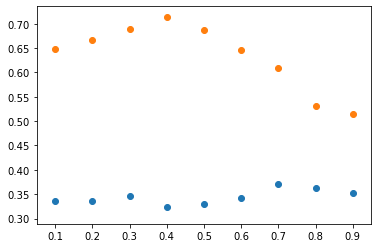

In [17]:
plt.scatter(np.arange(0.1, 1.0, 0.1), env_means)
plt.scatter(np.arange(0.1, 1.0, 0.1), norm_factors)

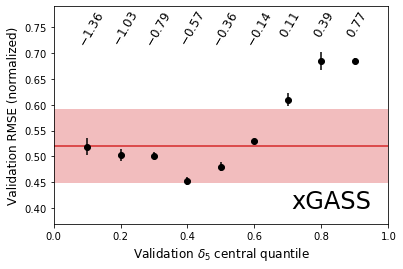

In [18]:

plt.errorbar(np.arange(0.1, 1.0, 0.1),
             env_means / norm_factors,
             env_stds / norm_factors, 
             c='k', marker='o', ls='none'
            )
plt.ylabel('Validation RMSE (normalized)', fontsize=12)
plt.xlabel(r'Validation $\delta_5$ central quantile', fontsize=12)


for i in range(len(env_means)):
    d5_mean = f'${logd5_means[i]:.2f}$'
    plt.text(x=np.arange(0.1, 1.0, 0.1)[i] - 0.03, 
             y=0.785, # env_results[i,1] / norm_factors[i]+2e-3, 
             s=d5_mean, #d5_range, 
             rotation=60,
             va='top',
             fontsize=12
            )
    
plt.axhline(0.3460 / overall_std, c='C3')
plt.axhspan((0.3460 - 0.0479) / overall_std,
            (0.3460 + 0.0479) / overall_std,
            alpha=0.3, lw=0,
            color='C3'
           )
    
plt.text(0.95, 0.4, 'xGASS', fontsize=24, ha='right')    
    
plt.ylim(0.37, 0.79)
plt.xlim(0.0, 1.0);

plt.savefig(f'{PATH}/results/figures/environment-trends-xGASS.pdf')
